In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt


## Importar datos

In [2]:
#Se cargan los datos
contract = pd.read_csv("/Users/rodrigolopez/Downloads/final_provider/contract.csv")
internet = pd.read_csv("/Users/rodrigolopez/Downloads/final_provider/internet.csv")
personal = pd.read_csv("/Users/rodrigolopez/Downloads/final_provider/personal.csv")
phone = pd.read_csv("/Users/rodrigolopez/Downloads/final_provider/phone.csv")


## Visualización de datos

### DF Contract

In [3]:
#Visualización de columnas
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
#Visualización del df
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


Se puede apreciar que el df contract cuenta con 8 columnas y 7043 filas. Esto quiere decir que tiene el registro de 7,043 clientes. 
A simple vista se ven bien los datos, será necesario realizar cambios en el nombre de la columnas y tipo de valor que tienen las columnas `BeginDate` y `TotalCharges`

In [5]:
def replace_column(string):
    """
    Función para corregir columnas a formato adecuado


    Args:
        string (string): nombre de la columna

    Returns:
        _type_: nombre de la columna corregido
    """
    
    n= [] #variable para almacenar lista de la posición de las mayusculas
    count = 0 #variable para correr espacios al agregar el caracter "_"

    for s in range(len(string)): #se buscan las posiciones de las mayusculas en el string
        if (string[s].isupper()) & (s != 0):
            n.append(s)
        
    c_list= list(string) #se covierte el string en una lista

    for a in n: #se agrega el "_" al string
        c_list.insert(a + count, "_")
        count += 1 
    string = "".join(c_list)
    return string.lower() #se cambia todo a minusculas

In [6]:
#Se corrgien todas las columnas
c = contract.columns
new_columns = []
for column in c:
    new_columns.append(replace_column(column))
contract.columns = new_columns
contract.rename(columns={"customer_i_d" : "customer_id"}, inplace=True)


In [7]:
#Se corroboran cambios
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

#### Columna customer_id

In [8]:
#Se buscan datos duplicados
contract["customer_id"].duplicated().sum()

0

No se encontraron datos duplicados en la columna, esto quiere decir que hay un ID distinto para cada cliente.

#### Columna begin_date

In [9]:
#Se cambia tipo de valor de los datos de la columna
contract["begin_date"] = pd.to_datetime(contract["begin_date"], format= "%Y-%m-%d")


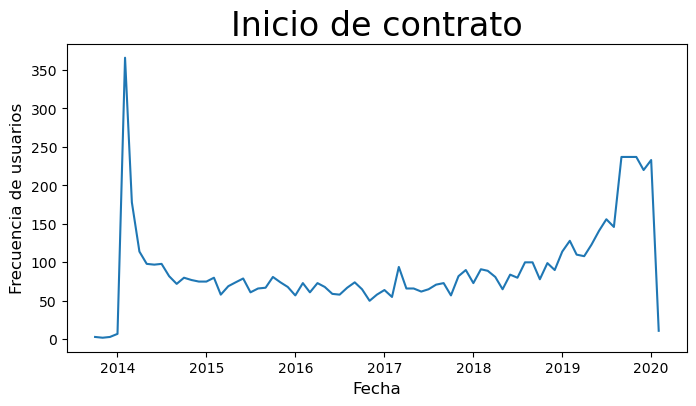

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(x=contract["begin_date"].value_counts().index, y=contract["begin_date"].value_counts(), ax = ax)
ax.set_title( "Inicio de contrato" , size = 24 )
ax.set_xlabel( "Fecha" , size = 12 )
ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
plt.show()

Se puede observar que los la mayoria de los usuarios del df iniciaron su contrato en 2014. La datos abarcan desde 2014 hasta 2020.

### Columna end_date

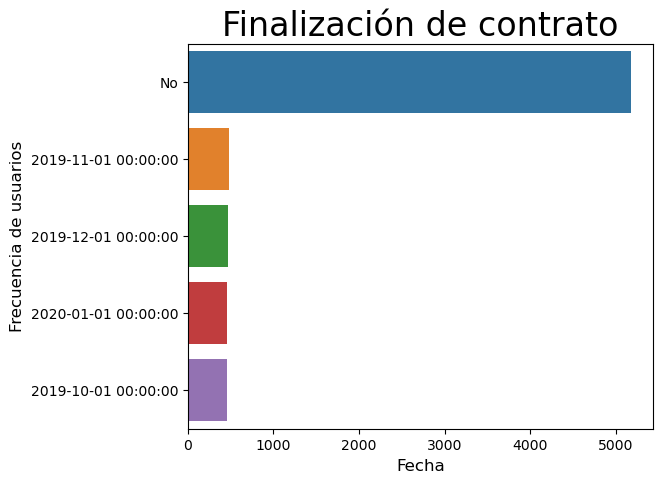

In [11]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.barplot(x=contract["end_date"].value_counts(), y=contract["end_date"].value_counts().index, ax= ax)
ax.set_title( "Finalización de contrato" , size = 24 )
ax.set_xlabel( "Fecha" , size = 12 )
ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
plt.show()

Se puede ver un desequilibrio en el termino de contrato. La gran mayoría de los usuarios siguen activos y solo una pequeña parte ha terminado su contrato en 4 fechas especificas. Esta información puede ser de gran valía, porque el modelo que se creará para fines de este proyecto tendra una afinidad por buscar usuario que aun no terminan su contrato.

### Columna type

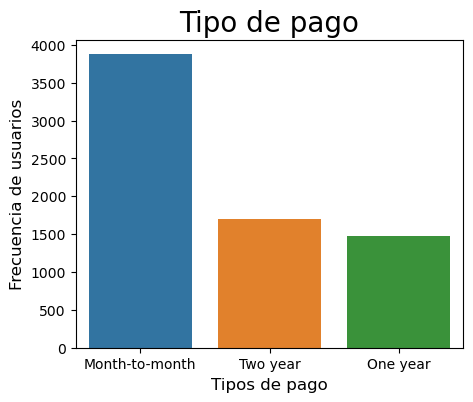

In [12]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.barplot(x=contract["type"].value_counts().index, y=contract["type"].value_counts(), ax= ax)
ax.set_title( "Tipo de pago" , size = 20 )
ax.set_xlabel( "Tipos de pago" , size = 12 )
ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
plt.show()

Se pueden observar que hay 3 tipos de pago distintos, donde los clientes prefieren pagar mes con mes.

### Columna paperless_billing

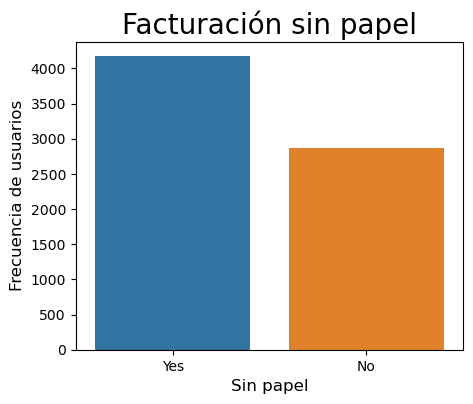

In [13]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.barplot(x=contract["paperless_billing"].value_counts().index, y=contract["paperless_billing"].value_counts(), ax= ax)
ax.set_title( "Facturación sin papel" , size = 20 )
ax.set_xlabel( "Sin papel" , size = 12 )
ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
plt.show()

Parece que los usuarios estan prefieriendo por una facturación electrónica.

### Columna payment_method

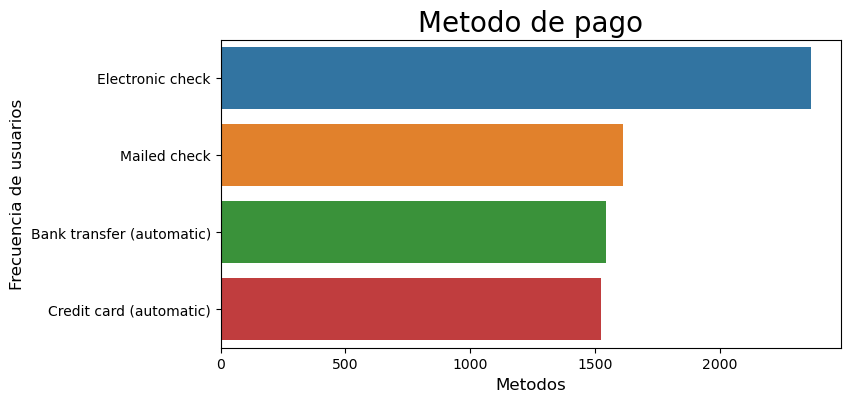

In [14]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(x=contract["payment_method"].value_counts(), y=contract["payment_method"].value_counts().index, ax= ax)
ax.set_title( "Metodo de pago" , size = 20 )
ax.set_xlabel( "Metodos" , size = 12)
ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
plt.show()

El método de pago más popular es el cheque electrónico. En cuanto a los demás no parece haber mucha diferencia entre ellos.

### Columna monthly_charges

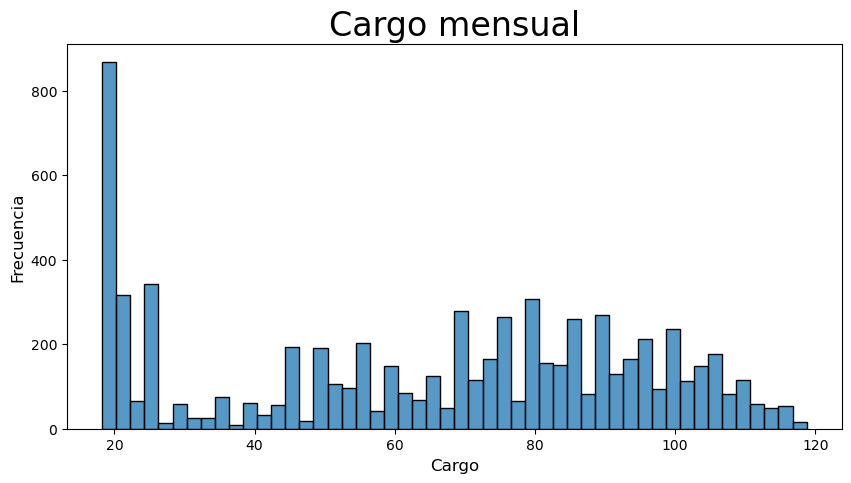

In [15]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(contract, x="monthly_charges", bins=50, ax = ax)
ax.set_title( "Cargo mensual" , size = 24 )
ax.set_xlabel( "Cargo" , size = 12 )
ax.set_ylabel( "Frecuencia" , size = 12 )
plt.show()

Se puede apreciar que los usuarios en promedio pagan entre aproximadamente 20 y 120 dolares al mes. En su mayoría los usuarios pagan menos de 20 dolares al mes. 

### Columna total_charges

In [16]:
#Se cambia el tipo de valor de los datos
contract["total_charges"] = pd.to_numeric(contract["total_charges"], errors="coerce", downcast="float")

In [17]:
#Se buscan valores ausentes
contract["total_charges"].isna().sum()

11

In [18]:
contract.query('total_charges.isna() == True')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Se puede apreciar que los valores ausentes en la columna `total_charges` se debe a que el tipo de plan que tienen y el tiempo de inicio del contrato, no ha llegado al corte y estos usuarios no han pagado por el servicio. Por consiguiente se rellenaran con 0.

In [19]:
#Se rellenan lo valores ausentes
contract["total_charges"] = contract["total_charges"].fillna(0)

In [20]:
#Se buscan valores ausentes
contract["total_charges"].isna().sum()

0

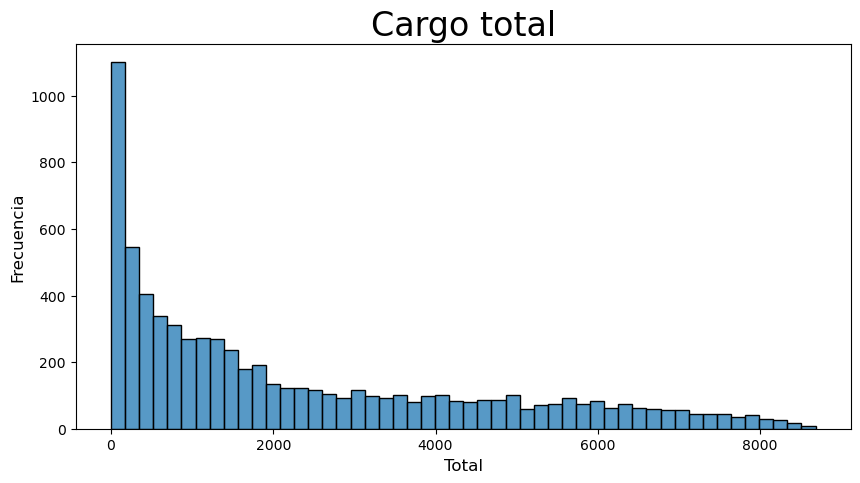

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(contract, x="total_charges", bins=50, ax = ax)
ax.set_title( "Cargo total" , size = 24 )
ax.set_xlabel( "Total" , size = 12 )
ax.set_ylabel( "Frecuencia" , size = 12 )
plt.show()

Se puede visualizar que la distirbución va desde 0 hasta un poco mas de 8,000 dolares. Se puede apreciar que muchos de los clientes han pagado menos de 1000 dolares en total. Esto es interesante, porque anteriormente vimos que la gran mayoría de los clientes tiene antiguedad de hasta 6 años. Es probable que muchos de estos hayan decicido no continuar con el servicio.

## DF internet

In [22]:
#Visualización de columnas
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [23]:
#Visualización del df
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Se puede apreciar que el archivo consta de 8 columnas y 5,517 filas. A simple vista no se encuentran valores ausentes. Se cambiará el formato de las columnas a uno mas adecuado de solo minúsculas.

In [24]:
#Se corrgien todas las columnas
c = internet.columns
new_columns = []
for column in c:
    new_columns.append(replace_column(column))
internet.columns = new_columns
internet.rename(columns={"customer_i_d" : "customer_id"}, inplace=True)
internet.rename(columns={"streaming_t_v" : "streaming_tv"}, inplace=True)

In [25]:
#Se corroboran cambios
internet.columns

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

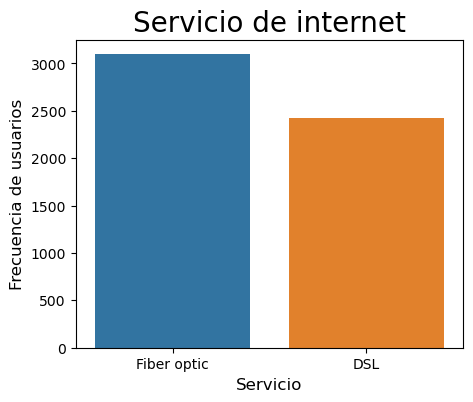

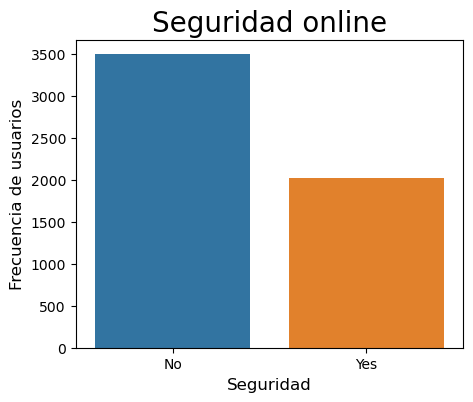

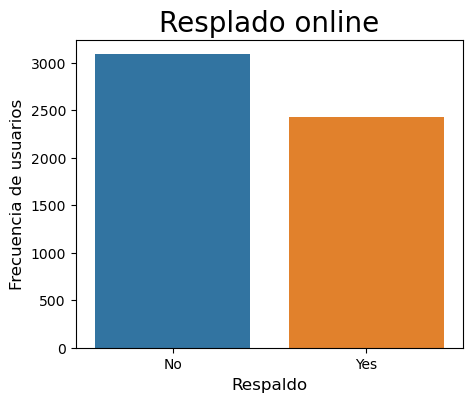

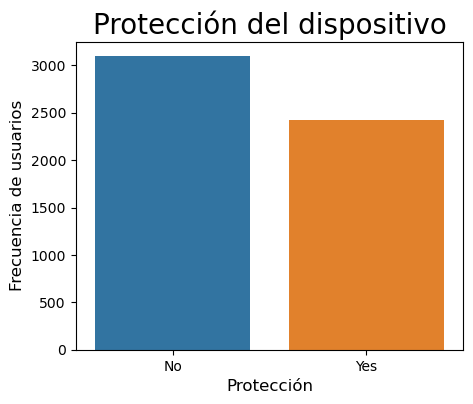

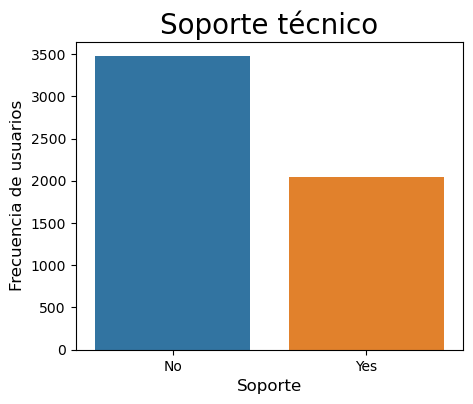

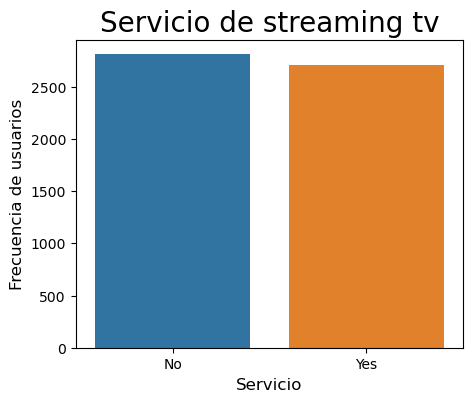

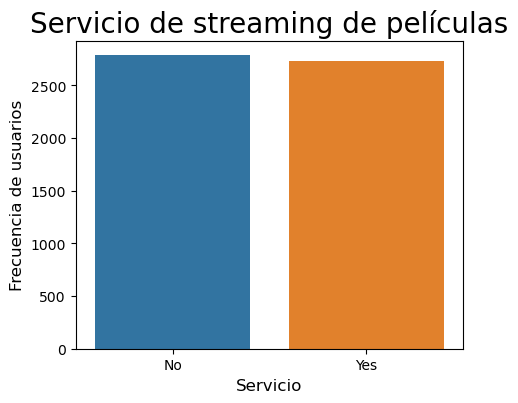

In [26]:
count = 0
title = [
    "Servicio de internet", "Seguridad online", "Resplado online", 
    "Protección del dispositivo", "Soporte técnico", "Servicio de streaming tv",
    "Servicio de streaming de películas"
         ]
x = [
    "Servicio", "Seguridad", "Respaldo", "Protección",
    "Soporte", "Servicio", "Servicio"
        ]
for serv in internet.columns[1:]:
    fig, ax = plt.subplots(figsize = (5, 4))
    sns.barplot(x=internet[serv].value_counts().index, y=internet[serv].value_counts(), ax= ax)
    ax.set_title(title[count] , size = 20 )
    ax.set_xlabel(x[count] , size = 12 )
    ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
    plt.show()  
    count += 1

Se puede apreciar en los gráficos que son opciones binarías elegidas por los clientes en su plan. La gran mayoría esta equilibradas. La distribución de los datos se ve adecuada.
El único detalle es la cantidad de cliente en el df, se deberá investigar el porque no aparecen los clientes.

In [27]:
customer = internet["customer_id"]
contract.query('customer_id not in(@customer)')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
11,7469-LKBCI,2018-10-01,No,Two year,No,Credit card (automatic),18.95,326.799988
16,8191-XWSZG,2015-10-01,No,One year,No,Mailed check,20.65,1022.950012
21,1680-VDCWW,2019-02-01,No,One year,No,Bank transfer (automatic),19.80,202.250000
22,1066-JKSGK,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,20.15,20.150000
33,7310-EGVHZ,2020-01-01,No,Month-to-month,No,Bank transfer (automatic),20.20,20.200001
...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,2015-11-01,No,Two year,No,Bank transfer (automatic),20.65,1020.750000
7019,9710-NJERN,2016-11-01,No,Two year,No,Mailed check,20.15,826.000000
7020,9837-FWLCH,2019-02-01,No,Month-to-month,Yes,Electronic check,19.20,239.000000
7030,0871-OPBXW,2019-12-01,No,Month-to-month,Yes,Mailed check,20.05,39.250000


No parece haber algun patrón visible, por el cual estos clientes no aparecen en el df contract.

In [28]:
for col in contract.columns[3:6]:
    print (contract.query('customer_id not in(@customer)').value_counts(col))
    print("___________")
    

type
Two year          638
Month-to-month    524
One year          364
Name: count, dtype: int64
___________
paperless_billing
No     1080
Yes     446
Name: count, dtype: int64
___________
payment_method
Mailed check                 741
Bank transfer (automatic)    332
Credit card (automatic)      331
Electronic check             122
Name: count, dtype: int64
___________


No parece haber relación concluyente con las columnas.

## DF personal

In [29]:
#Visualización de columnas
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [30]:
#Visualización del df
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Los datos del archivo personal contienen 5 columnas y 7,043 filas. A simple vista no parece haber datos ausentes. Solo se requerirá modificar el formato del nombre de las columnas.

In [31]:
#Se corrgien todas las columnas
c = personal.columns
new_columns = []
for column in c:
    new_columns.append(replace_column(column))
personal.columns = new_columns
personal.rename(columns={"customer_i_d" : "customer_id"}, inplace=True)


In [32]:
#Se corroboran cambios
personal.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')

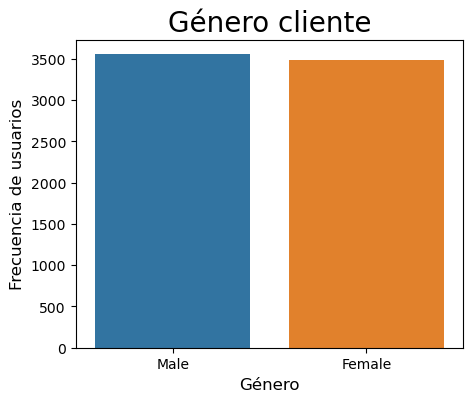

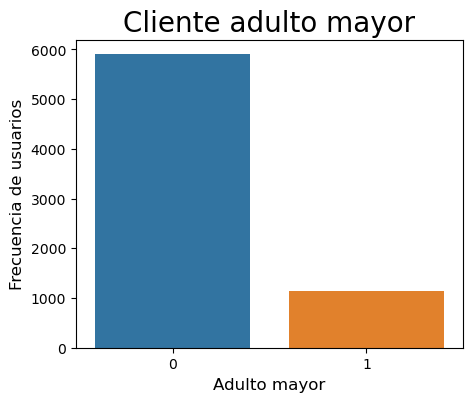

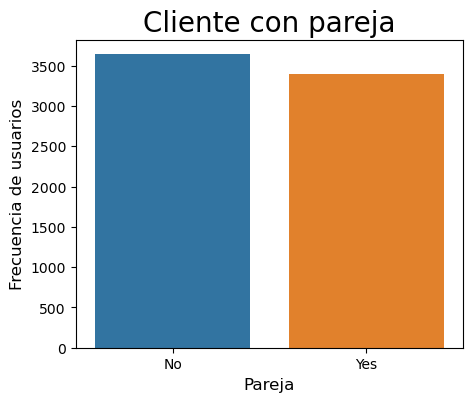

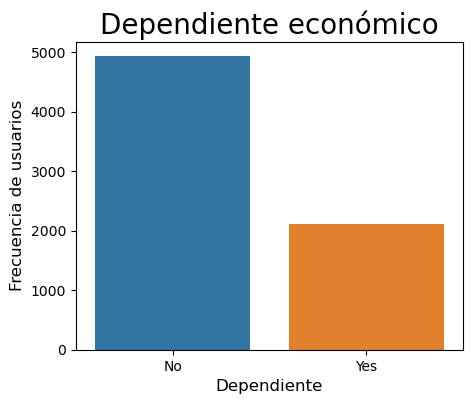

In [33]:
count = 0
title = [
    "Género cliente", "Cliente adulto mayor", "Cliente con pareja", 
    "Dependiente económico"
         ]
x = [
    "Género", "Adulto mayor", "Pareja", "Dependiente",
        ]
for pers in personal.columns[1:]:
    fig, ax = plt.subplots(figsize = (5, 4))
    sns.barplot(x=personal[pers].value_counts().index, y=personal[pers].value_counts(), ax= ax)
    ax.set_title(title[count] , size = 20 )
    ax.set_xlabel(x[count] , size = 12 )
    ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
    plt.show()  
    count += 1

Se puede apreciar la distirbución personal de los clientes en los gráficos. No parece haber problema en el conjunto de datos.

## DF phone

In [34]:
#Visualización de columnas
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [35]:
#Visualización del df
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


El archivo phone cuenta con 2 columnas y 6,391 filas. No parecen haber datos ausentes. Solo se cambiará el formato de las columnas para una mejor visualización.

A continuación se realizará el cambio de formato del nombre de las columnas de todos los archivos.

In [36]:
#Se corrgien todas las columnas
c = phone.columns
new_columns = []
for column in c:
    new_columns.append(replace_column(column))
phone.columns = new_columns
phone.rename(columns={"customer_i_d" : "customer_id"}, inplace=True)


In [37]:
#Se corroboran cambios
phone.columns

Index(['customer_id', 'multiple_lines'], dtype='object')

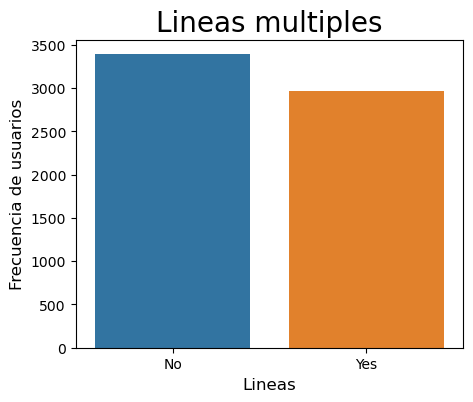

In [38]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.barplot(x=phone["multiple_lines"].value_counts().index, y=phone["multiple_lines"].value_counts(), ax= ax)
ax.set_title("Lineas multiples" , size = 20 )
ax.set_xlabel("Lineas" , size = 12 )
ax.set_ylabel( "Frecuencia de usuarios" , size = 12 )
plt.show()  

Se puede apreciar que los clientes de manera indistinta tienden a tener multiples lineas.
De igual manera, los datos del conjunto de datos `phone` no aparecen todos los clientes de los contratos. Se tratá de buscar una relación delporque faltan estos datos.

In [39]:
customer = phone["customer_id"]
contract.query('customer_id not in(@customer)')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.850000
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.750000
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.899994
20,8779-QRDMV,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.650002
27,8665-UTDHZ,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.200001
...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,2017-12-01,No,Month-to-month,No,Electronic check,35.75,1022.500000
7007,2274-XUATA,2014-02-01,No,Two year,Yes,Bank transfer (automatic),63.10,4685.549805
7029,2235-DWLJU,2019-08-01,No,Month-to-month,Yes,Electronic check,44.40,263.049988
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,743.299988


In [40]:
for col in contract.columns[3:6]:
    print (contract.query('customer_id not in(@customer)').value_counts(col))
    print("___________")
    

type
Month-to-month    376
Two year          161
One year          145
Name: count, dtype: int64
___________
paperless_billing
Yes    387
No     295
Name: count, dtype: int64
___________
payment_method
Electronic check             226
Mailed check                 159
Credit card (automatic)      154
Bank transfer (automatic)    143
Name: count, dtype: int64
___________


In [41]:
for col in personal.columns[1:]:
    print (personal.query('customer_id not in(@customer)').value_counts(col))
    print("___________")
    

gender
Male      351
Female    331
Name: count, dtype: int64
___________
senior_citizen
0    578
1    104
Name: count, dtype: int64
___________
partner
No     371
Yes    311
Name: count, dtype: int64
___________
dependents
No     476
Yes    206
Name: count, dtype: int64
___________


No parece haber una relación concluyente con los datos faltantes.

## Adecuación de los datos

A continuación, se realizará la unión de los 4 archivos para continuar con la relación de las columnas y crear una nueva columna `target` para el entrenamiento del modelo. La nueva columna será creada con los datos del dataframe `contract` y la columna `end_date`.

In [42]:
#Union de df
data = contract.merge(personal, how= "left", on= "customer_id").merge(
    internet, how="left", on="customer_id").merge(phone, how="left", on="customer_id")

In [43]:
data

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.850000,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.500000,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.150002,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.750000,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.649994,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.500000,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.899902,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.450012,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.600006,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [44]:
#Se crea columna target
data["target"] = (data["end_date"] != "No").astype("float")

In [45]:
#Se corrobora la creación de la columna
data.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.850000,Female,0,...,No,DSL,No,Yes,No,No,No,No,NaN,0.0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.500000,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0.0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.150002,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,1.0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.750000,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,NaN,0.0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.649994,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,1.0


Se agregó la columna de manera correcta.

In [46]:
print("Porcentaje de los valores ausentes",
round((1 - data.dropna().shape[0] / data.shape[0]) * 100, 2),"%")

Porcentaje de los valores ausentes 31.35 %


En caso de eliminar los valores ausentes se perdería un 31% de la información.

## Plan de trabajo

Se ha realizado una parte del analisis exploratorio de los datos y adecuaciones para empezar a realizar un modelo adecuado para la predicción de los clientes que ya no continuan con el servicio de la empresa. Se realizarán las siguiente acciones del proyecto:

1. Se realizará un analisis de correlación entre todas las columnas con la columna `target` para identificar cuales características impactan de mayor manera en el resultado. Esto ayudará a filtrar carácterísticas que no sean necesariás para la creación del modelo.

2. Se realizarán las adecuaciones necesarias para las características de clasificación utilizando el método que mejor resulte al modelo.

3. Se crearán las dataframen de entrenamiento, validación y test para los modelos.

4. Se crearán 3 modelos: regresión logistica, bosque aleatorio y grandiente de catboost para el modelo.

5. Se evaluarán la precisión y la curba AUROC como metódo de medición.

## Aclaraciones

Es dataframe final `data` tiene valores ausentes en consecuencia del merge, no se encuentraron patrones con los que se puede complementar la información ausente y eliminarlos equivaldría solo utilizar un 69% de la información. La forma más adecuada de llenarlos es asignarles el valor que mas prevalece de cada columna. Pregunta: es valido el modo de rellenado de los valores ausentes o de preferencia deben ser eliminados?